# §2 ARMA過程

In [1]:
%matplotlib inline

from __future__ import unicode_literals, print_function
import six
import sys
import os
import math
import datetime as dt
import numpy as np
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('seaborn-whitegrid')
plt.rcParams['font.family'] = 'IPAexGothic'

In [2]:
sys.version_info

sys.version_info(major=3, minor=6, micro=0, releaselevel='final', serial=0)

## テキスト

### MA(1)過程から発生させたデータ

In [241]:
def ma_process(mean, thetas, sigma, nsample=100):
    ar = np.array([1])
    ma = np.r_[len(thetas), np.asarray(thetas)]
    return mean + sm.tsa.arma_generate_sample(ar, ma, nsample, sigma=sigma)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12dc65748>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x13081ef28>]], dtype=object)

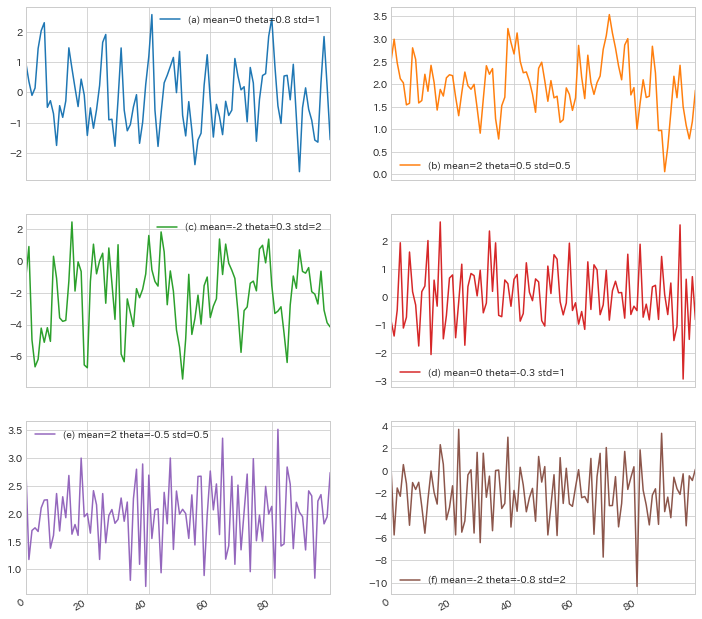

In [242]:
params = [
    {'name': 'a', 'mean':  0, 'theta':  0.8, 'std': 1},
    {'name': 'b', 'mean':  2, 'theta':  0.5, 'std': 0.5},
    {'name': 'c', 'mean': -2, 'theta':  0.3, 'std': 2},
    {'name': 'd', 'mean':  0, 'theta': -0.3, 'std': 1},
    {'name': 'e', 'mean':  2, 'theta': -0.5, 'std': 0.5},
    {'name': 'f', 'mean': -2, 'theta': -0.8, 'std': 2},
]

ma_series = pd.DataFrame()

for item in params:
    title = '({}) mean={} theta={} std={}'.format(item['name'], item['mean'], item['theta'], item['std'])
    ma_series[title] = ma_process(item['mean'], [item['theta']], item['std'])

ma_series.plot(subplots=True, layout=(3,2), figsize=(12,12))

### MA過程のコレログラム

ホワイトノイズを含むのでテキストのように綺麗なコレログラムにはならない

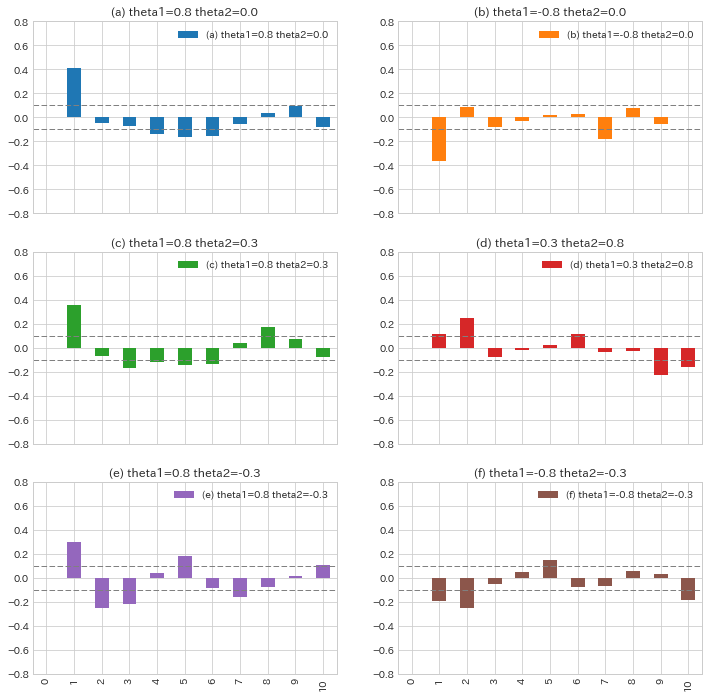

In [243]:
params = [
    {'name': 'a', 'theta1':  0.8, 'theta2':  0.0},
    {'name': 'b', 'theta1': -0.8, 'theta2':  0.0},
    {'name': 'c', 'theta1':  0.8, 'theta2':  0.3},
    {'name': 'd', 'theta1':  0.3, 'theta2':  0.8},
    {'name': 'e', 'theta1':  0.8, 'theta2': -0.3},
    {'name': 'f', 'theta1': -0.8, 'theta2': -0.3},
]

ma_coefs = pd.DataFrame()

for item in params:
    title = '({}) theta1={} theta2={}'.format(item['name'], item['theta1'], item['theta2'])
    x = ma_process(0.0, [item['theta1'], item['theta2']], 50.0)
    c = sm.tsa.stattools.acf(x, nlags=10)
    c[0] = np.nan
    ma_coefs[title] = c

axes = ma_coefs.plot.bar(subplots=True, layout=(3,2), figsize=(12,12), ylim=(-0.8, 0.8))

for ax in axes.ravel():
    ax.axhline(0.1, ls='--', color='#808080', linewidth=1)
    ax.axhline(-0.1, ls='--', color='#808080', linewidth=1)

### AR(1)過程から発生させたデータ

`arma_generate_sample()`をつかっているためテキストとは波形の出方が異なる 

In [236]:
phis = [0.8, 0.3]
np.r_[len(phis), -1 * np.array(phis)]

array([ 2. , -0.8, -0.3])

In [237]:
def ar_process(mean, phis, sigma, nsample=100):
    ar = np.r_[len(phis), -1 * np.array(phis)]
    ma = np.array([1])
    return mean + sm.tsa.arma_generate_sample(ar, ma, nsample, sigma=sigma)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12d087e10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12d8ed8d0>]], dtype=object)

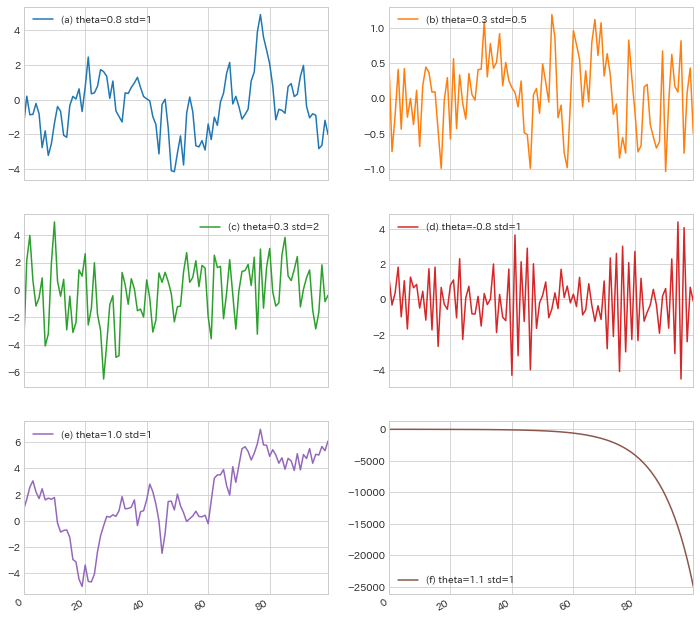

In [238]:
params = [
    {'name': 'a', 'mean':  0, 'theta':  0.8, 'std': 1},
    {'name': 'b', 'mean':  0, 'theta':  0.3, 'std': 0.5},
    {'name': 'c', 'mean':  0, 'theta':  0.3, 'std': 2},
    {'name': 'd', 'mean':  0, 'theta': -0.8, 'std': 1},
    {'name': 'e', 'mean':  0, 'theta':  1.0, 'std': 1},
    {'name': 'f', 'mean':  0, 'theta':  1.1, 'std': 1},
]

ar_series = pd.DataFrame()

for item in params:
    title = '({}) theta={} std={}'.format(item['name'], item['theta'], item['std'])
    ar_series[title] = ar_process(item['mean'], [item['theta']], item['std'])

ar_series.plot(subplots=True, layout=(3,2), figsize=(12,12))

### AR(1)過程とAR(2)過程のコレログラム

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12e001ba8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12cdc30f0>]], dtype=object)

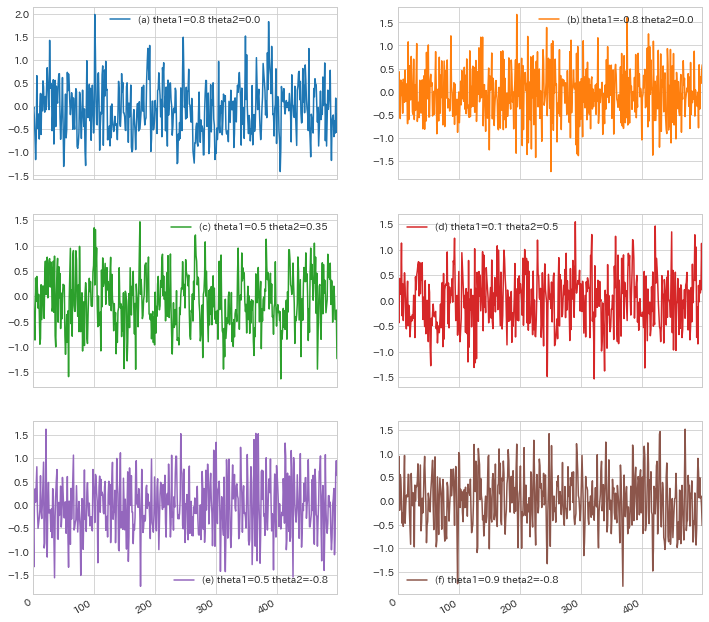

In [239]:
params = [
    {'name': 'a', 'theta1':  0.8, 'theta2':  0.0},
    {'name': 'b', 'theta1': -0.8, 'theta2':  0.0},
    {'name': 'c', 'theta1':  0.5, 'theta2':  0.35},
    {'name': 'd', 'theta1':  0.1, 'theta2':  0.5},
    {'name': 'e', 'theta1':  0.5, 'theta2': -0.8},
    {'name': 'f', 'theta1':  0.9, 'theta2': -0.8},
]

ar_series = pd.DataFrame()

for item in params:
    title = '({}) theta1={} theta2={}'.format(item['name'], item['theta1'], item['theta2'])
    ar_series[title] = ar_process(0.0, [item['theta1'], item['theta2']], 1.0, 500)

ar_series.plot(subplots=True, layout=(3,2), figsize=(12,12))

In [246]:
for index, series in ar_series.iteritems():
    print(series)

0     -0.398234
1     -0.091507
2     -0.015473
3     -0.275398
4     -0.660599
5     -1.156971
6     -0.696987
7      0.666411
8     -0.476740
9     -0.238407
10    -0.165115
11    -0.709728
12     0.004706
13     0.279770
14    -0.610551
15     0.260376
16    -0.097221
17     0.553560
18     0.422390
19    -0.070054
20    -0.125951
21     0.214144
22    -0.072414
23     0.441705
24     0.838461
25     0.490955
26     0.027549
27    -0.069972
28     1.433904
29     0.393846
         ...   
470   -0.499770
471   -0.111728
472    0.331182
473   -0.287229
474   -0.136930
475   -0.172659
476    0.638235
477    0.024438
478    0.060032
479    0.942787
480   -0.745960
481    0.044493
482   -0.862051
483   -0.236869
484    0.352086
485   -0.065368
486    0.110153
487    0.310081
488    0.783784
489   -0.464001
490   -1.174873
491   -0.313752
492   -0.216680
493   -0.187907
494   -0.657906
495   -0.317261
496   -0.582383
497    0.179465
498   -0.565176
499   -0.168247
Name: (a) theta1=0.8 the

In [244]:
for column, series in ar_series.iteritems():
    c = sm.tsa.stattools.acf(series, nlags=10)
    c[0] = np.nan
    ar_coefs[title] = c

axes = ar_coefs.plot.bar(subplots=True, layout=(3,2), figsize=(12,12), ylim=(-0.8, 0.8))



TypeError: len() of unsized object